In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("data/housingdata.csv")

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# 1. 결측치 처리

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 데이터 분할 (train/test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# 1. 학습 데이터의 결측치를 평균으로 채우기
imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

# 2. 평가 데이터의 결측치를 평가 데이터 자체의 평균으로 채우기
test_imputer = SimpleImputer(strategy='mean')
test_data_imputed = pd.DataFrame(test_imputer.fit_transform(test_data), columns=test_data.columns)

# 3. 결과 확인
print("Train Data after Imputation:")
print(train_data_imputed.info())
print("Test Data after Imputation:")
print(test_data_imputed.info())

Train Data after Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB
None
Test Data after Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0

# 2. 상관 관계 행렬 계산

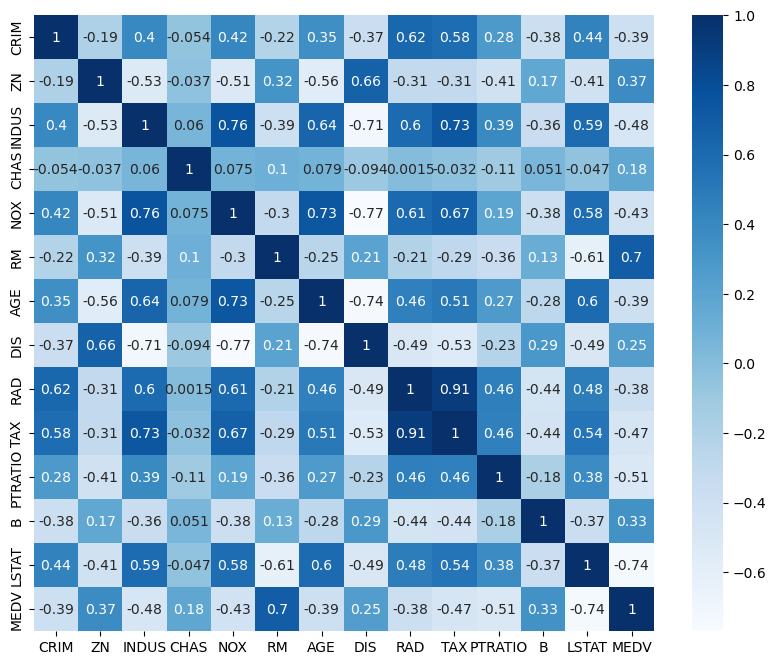

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# 히트맵으로 상관관계 그리기
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Display the plot
plt.show()

In [6]:
# MEDV와 상관 계수가 낮은 특징 제거 (임계값 0.3 설정)
correlation_matrix = df.corr()
low_correlation_features = correlation_matrix[abs(correlation_matrix['MEDV']) < 0.3].index
df = df.drop(low_correlation_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      486 non-null    float64
 6   RAD      506 non-null    int64  
 7   TAX      506 non-null    int64  
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    486 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


# 3. 데이터 분할 및 스케일링

In [7]:
# Separate target variable
X_train = train_data_imputed.drop('MEDV', axis=1)
y_train = train_data_imputed['MEDV']

X_test = test_data_imputed.drop('MEDV', axis=1)
y_test = test_data_imputed['MEDV']

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 훈련 데이터 스케일링 (정규화)
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 스케일링 (훈련 데이터에서 학습된 scaler 사용)
X_test_scaled = scaler.transform(X_test) # transform만 사용. fit 사용 Xx

In [11]:
# 최종적으로 사용할 데이터 형태 확인
# DataFrame으로 다시 변환
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.298214,-0.502730,1.078261,-0.284579,0.489252,-1.428069,1.062614,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.786969
1,-0.338071,-0.502730,-0.409095,-0.284579,-0.157233,-0.680087,-0.435236,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.576420
2,-0.405442,0.000000,-0.719707,-0.284579,-1.008723,-0.402063,-1.654075,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.668425
3,0.391986,-0.502730,1.078261,-0.284579,0.489252,-0.300450,0.000000,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.554081
4,-0.326885,-0.502730,-0.409095,-0.284579,-0.157233,-0.831094,0.042020,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.172458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.389922,-0.502730,-0.346375,-0.284579,-0.310348,-0.677264,0.864369,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.888479
400,-0.375378,0.371092,-0.585308,-0.284579,-0.786706,-0.649038,-0.963889,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.074806
401,-0.407675,2.992559,-1.324506,-0.284579,-1.033391,0.450354,-1.419118,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.932941
402,0.859136,-0.502730,1.078261,-0.284579,1.561057,0.441886,0.963492,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.551205


In [13]:
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.398949,-0.502730,0.148425,-0.284579,-0.395412,0.141282,0.029695,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.494477
1,-0.402966,1.244914,-0.667441,3.658871,-0.931315,0.623942,-1.301640,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.286586
2,-0.397363,-0.502730,2.517830,-0.284579,0.446720,-0.469805,1.117682,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.803661
3,-0.398965,-0.502730,-0.010376,-0.284579,-1.220532,-0.354079,-2.223112,0.694876,-0.624360,-0.596698,0.396095,0.378682,-1.000507
4,0.169180,-0.502730,1.078261,-0.284579,1.331384,-0.026661,0.860698,-0.676503,1.706891,1.578434,0.845343,0.315043,0.688655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.728722,-0.502730,1.078261,-0.284579,0.344643,-2.382098,1.161737,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.146924
98,1.229721,-0.502730,1.078261,-0.284579,1.561057,0.204790,0.915766,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.800786
99,1.187655,-0.502730,1.078261,-0.284579,0.344643,0.481403,1.161737,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.256501
100,-0.403484,-0.502730,-0.954160,-0.284579,-0.914302,-0.424644,-0.853753,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.054680


# 4. 모델 학습 및 평가

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 모델 정의
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42) # random_state 고정
model_rf = RandomForestRegressor(random_state=42) # random_state 고정

# 모델 학습 (스케일링된 데이터 사용)
model_lr.fit(X_train_scaled, y_train)
model_dt.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)

# 예측
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_dt = model_dt.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)

# 평가 함수
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} MSE: {mse:.2f}")
    print(f"{model_name} R²: {r2:.2f}")
    return mae, mse, r2

# 모델 평가
lr_mae, lr_mse, lr_r2 = evaluate_model(y_test, y_pred_lr, "Linear Regression")
dt_mae, dt_mse, dt_r2 = evaluate_model(y_test, y_pred_dt, "Decision Tree")
rf_mae, rf_mse, rf_r2 = evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression MAE: 3.15
Linear Regression MSE: 25.06
Linear Regression R²: 0.66
Decision Tree MAE: 2.68
Decision Tree MSE: 12.04
Decision Tree R²: 0.84
Random Forest MAE: 2.06
Random Forest MSE: 8.16
Random Forest R²: 0.89


# 5. 결과 비교

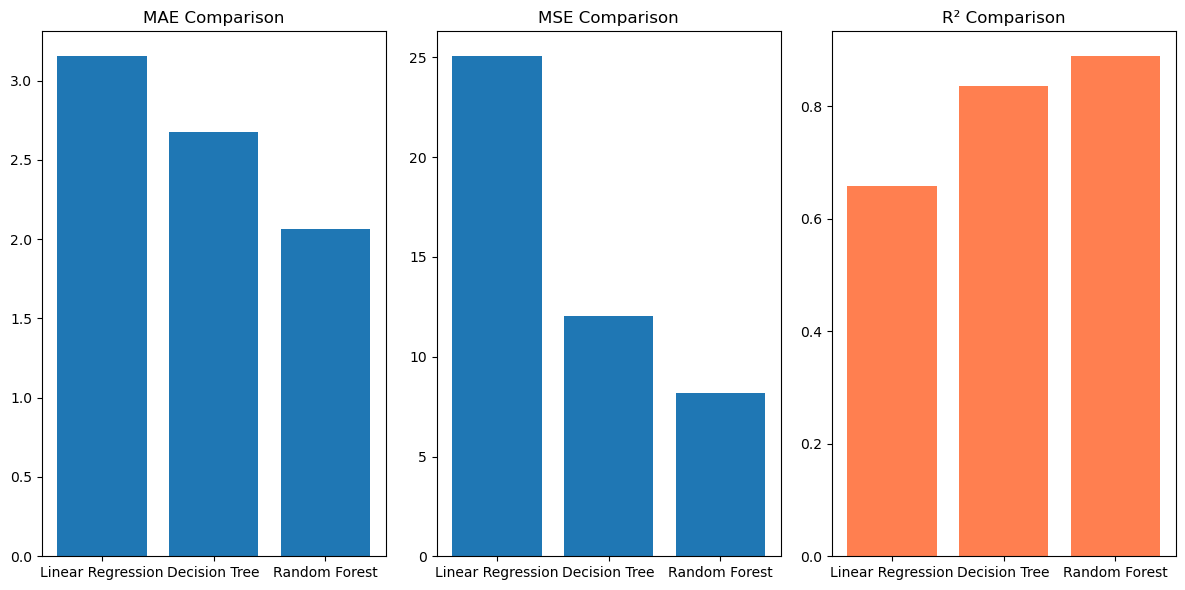

In [15]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_scores = [lr_mae, dt_mae, rf_mae]
mse_scores = [lr_mse, dt_mse, rf_mse]
r2_scores = [lr_r2, dt_r2, rf_r2]

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mae_scores)
plt.title('MAE Comparison') # MAE 비교. 낮을 수록 좋음

plt.subplot(1, 3, 2)
plt.bar(models, mse_scores)
plt.title('MSE Comparison') # MSE 비교. 낮을 수록 좋음

plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='coral')
plt.title('R² Comparison') # R² 비교. 높을 수록 좋음

plt.tight_layout()
plt.show()